# Business Analysis & Insights for Regork

# Introduction

The primary objective of our project is to enhance sales performance and examine the impact of coupons, marketing campaigns, and purchasing behavior on sales.

We are addressing the following problem statements -


1) Which products can be targeted with combined offers based on their tendency to be bought together?

2) How can we improve the effectiveness of coupon-based marketing campaigns by analyzing redemption rates ?

3) How does the holiday season impact coupon redemptions and which department performs better during this period ?

4) What is the contribution to sales by different type of customers during holiday and non-holiday periods ?


# Packages Required

- **completejourney\_py:** A package that provides access to data sets characterizing household level transactions over one year for a group of households who are frequent shoppers at a grocery store

- **NumPy:** A powerful scientific computing package that allows for efficient array and matrix operations, as well as mathematical and statistical calculations.

- **Pandas:** A data manipulation and analysis package that provides easy-to-use data structures and functions for handling tabular and time series data.

- **Itertools – combinations:** A module in the standard library that provides tools for creating iterators for efficient looping and combination of data.

- **Seaborn:** A Python data visualization library based on Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics.

- **Matplotlib:** A comprehensive data visualization library that provides a wide range of static, animated, and interactive visualization options.

- **Squarify:** A Python library for creating treemap visualizations, where rectangles are sized according to a certain attribute of the data.

- **Calendar:** A module in the standard library that provides various calendar-related functions and utilities.

- **os:** A standard library module for file system interaction.

- **warnings:** A standard library module for handling warnings in Python programs.


### Packages Import Code :-

In [2]:
import completejourney_py
from completejourney_py import get_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import squarify
from itertools import combinations
import calendar
import os
import warnings
warnings.filterwarnings('ignore')

## Data Preparation :-

## Exploratory Data Analysis

## Product Affinity Analysis

In this section, we are trying to determine which two products will go together most often in the same basket. We intend to find the top 10 list of such product combinations which go together in maximum number of baskets.

### Preparing Data for Analysis

In [3]:
data = get_data()
transactions = data['transactions']
transactions

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                 900       330  31198570047     9878513         1   
2                1228       406  31198655051     1041453         1   
3                 906       319  31198705046     1020156         1   
4                 906       319  31198705046     1053875         2   
...               ...       ...          ...         ...       ...   
1469302           679       447  41453103606    14025548         1   
1469303          2070       311  41453083334      909894         1   
1469304          2070       311  41453083334      933067         2   
1469305          2070       311  41453083334     1029743         1   
1469306          2070       311  41453083334     1061220         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               0.99         0.10          0.0                0.0     1   
2               1.43         0.15          0.0                0.0     1   
3               1.50         0.29          0.0                0.0     1   
4               2.78         0.80          0.0                0.0     1   
...              ...          ...          ...                ...   ...   
1469302         0.79         0.20          0.0                0.0    53   
1469303         1.73         0.17          0.0                0.0    53   
1469304         5.00         2.98          0.0                0.0    53   
1469305         2.60         0.29          0.0                0.0    53   
1469306         1.19         0.13          0.0                0.0    53   

        transaction_timestamp  
0         2017-01-01 11:53:26  
1         2017-01-01 12:10:28  
2         2017-01-01 12:26:30  
3         2017-01-01 12:30:27  
4         2017-01-01 12:30:27  
...                       ...  
1469302   2018-01-01 03:50:03  
1469303   2018-01-01 04:01:20  
1469304   2018-01-01 04:01:20  
1469305   2018-01-01 04:01:20  
1469306   2018-01-01 04:01:20  

[1469307 rows x 11 columns]

In [4]:
products = data['products']
products

product_id  manufacturer_id     department     brand  \
0           25671                2        GROCERY  National   
1           26081                2  MISCELLANEOUS  National   
2           26093               69         PASTRY   Private   
3           26190               69        GROCERY   Private   
4           26355               69        GROCERY   Private   
...           ...              ...            ...       ...   
92326    18293142             6384        DRUG GM  National   
92327    18293439             6393        DRUG GM  National   
92328    18293696             6406        DRUG GM  National   
92329    18294080             6442        DRUG GM  National   
92330    18316298              764        GROCERY  National   

           product_category            product_type package_size  
0                  FRZN ICE     ICE - CRUSHED/CUBED        22 LB  
1                      None                    None         None  
2                     BREAD    BREAD:ITALIAN/FRENCH         None  
3      FRUIT - SHELF STABLE             APPLE SAUCE        50 OZ  
4             COOKIES/CONES       SPECIALTY COOKIES        14 OZ  
...                     ...                     ...          ...  
92326             BOOKSTORE         PAPERBACK BOOKS         None  
92327             BOOKSTORE       CHILDRENS LOW END         None  
92328             BOOKSTORE   PAPERBACK BEST SELLER         None  
92329             BOOKSTORE         PAPERBACK BOOKS         None  
92330          PAPER TOWELS  PAPER TOWELS & HOLDERS         None  

[92331 rows x 7 columns]

In [5]:
transactions

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                 900       330  31198570047     9878513         1   
2                1228       406  31198655051     1041453         1   
3                 906       319  31198705046     1020156         1   
4                 906       319  31198705046     1053875         2   
...               ...       ...          ...         ...       ...   
1469302           679       447  41453103606    14025548         1   
1469303          2070       311  41453083334      909894         1   
1469304          2070       311  41453083334      933067         2   
1469305          2070       311  41453083334     1029743         1   
1469306          2070       311  41453083334     1061220         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               0.99         0.10          0.0                0.0     1   
2               1.43         0.15          0.0                0.0     1   
3               1.50         0.29          0.0                0.0     1   
4               2.78         0.80          0.0                0.0     1   
...              ...          ...          ...                ...   ...   
1469302         0.79         0.20          0.0                0.0    53   
1469303         1.73         0.17          0.0                0.0    53   
1469304         5.00         2.98          0.0                0.0    53   
1469305         2.60         0.29          0.0                0.0    53   
1469306         1.19         0.13          0.0                0.0    53   

        transaction_timestamp  
0         2017-01-01 11:53:26  
1         2017-01-01 12:10:28  
2         2017-01-01 12:26:30  
3         2017-01-01 12:30:27  
4         2017-01-01 12:30:27  
...                       ...  
1469302   2018-01-01 03:50:03  
1469303   2018-01-01 04:01:20  
1469304   2018-01-01 04:01:20  
1469305   2018-01-01 04:01:20  
1469306   2018-01-01 04:01:20  

[1469307 rows x 11 columns]

In [6]:
products

product_id  manufacturer_id     department     brand  \
0           25671                2        GROCERY  National   
1           26081                2  MISCELLANEOUS  National   
2           26093               69         PASTRY   Private   
3           26190               69        GROCERY   Private   
4           26355               69        GROCERY   Private   
...           ...              ...            ...       ...   
92326    18293142             6384        DRUG GM  National   
92327    18293439             6393        DRUG GM  National   
92328    18293696             6406        DRUG GM  National   
92329    18294080             6442        DRUG GM  National   
92330    18316298              764        GROCERY  National   

           product_category            product_type package_size  
0                  FRZN ICE     ICE - CRUSHED/CUBED        22 LB  
1                      None                    None         None  
2                     BREAD    BREAD:ITALIAN/FRENCH         None  
3      FRUIT - SHELF STABLE             APPLE SAUCE        50 OZ  
4             COOKIES/CONES       SPECIALTY COOKIES        14 OZ  
...                     ...                     ...          ...  
92326             BOOKSTORE         PAPERBACK BOOKS         None  
92327             BOOKSTORE       CHILDRENS LOW END         None  
92328             BOOKSTORE   PAPERBACK BEST SELLER         None  
92329             BOOKSTORE         PAPERBACK BOOKS         None  
92330          PAPER TOWELS  PAPER TOWELS & HOLDERS         None  

[92331 rows x 7 columns]

### Data Joining

In this section, we are trying to join the transactions and products table so that we can have the columns - "basket id" and "product id" in the same table.

In [7]:
prod_trans = pd.merge(transactions, products, on="product_id")
prod_trans

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                1276       380  31198977289     1095275         2   
2                 762     31862  31225375060     1095275         1   
3                 113       375  31225637831     1095275         4   
4                 762     31862  31242385045     1095275         1   
...               ...       ...          ...         ...       ...   
1464466           287       396  41453077846      832759         1   
1464467          2255       391  41453429649      824678         1   
1464468          2410       315  41453087896    13910189         1   
1464469             6       450  41453124052    12263667         1   
1464470           811       446  41453043580     5587661         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               1.00         0.00          0.0                0.0     1   
2               0.50         0.00          0.0                0.0     2   
3               2.00         0.00          0.0                0.0     2   
4               0.25         0.25          0.0                0.0     2   
...              ...          ...          ...                ...   ...   
1464466         5.99         0.00          0.0                0.0    53   
1464467         6.99         0.00          0.0                0.0    53   
1464468         0.99         1.00          0.0                0.0    53   
1464469         1.99         0.00          0.0                0.0    53   
1464470         0.99         0.00          0.0                0.0    53   

        transaction_timestamp  manufacturer_id  department     brand  \
0         2017-01-01 11:53:26                2      PASTRY  National   
1         2017-01-01 22:23:53                2      PASTRY  National   
2         2017-01-02 12:39:36                2      PASTRY  National   
3         2017-01-02 21:09:18                2      PASTRY  National   
4         2017-01-03 12:21:27                2      PASTRY  National   
...                       ...              ...         ...       ...   
1464466   2018-01-01 02:00:27             2468     GROCERY  National   
1464467   2018-01-01 02:02:29             2464     GROCERY  National   
1464468   2018-01-01 02:25:57              970     DRUG GM  National   
1464469   2018-01-01 02:47:31             1407     DRUG GM  National   
1464470   2018-01-01 03:25:48             5423  MEAT-PCKGD  National   

                       product_category              product_type package_size  
0                                 ROLLS             ROLLS: BAGELS         4 OZ  
1                                 ROLLS             ROLLS: BAGELS         4 OZ  
2                                 ROLLS             ROLLS: BAGELS         4 OZ  
3                                 ROLLS             ROLLS: BAGELS         4 OZ  
4                                 ROLLS             ROLLS: BAGELS         4 OZ  
...                                 ...                       ...          ...  
1464466                   DOMESTIC WINE       POPULAR 750ML WINES       750 ML  
1464467                   IMPORTED WINE  ALL OTHER IMPORTED WINES        1.5 L  
1464468             CHRISTMAS  SEASONAL                     DECOR         None  
1464469  GREETING CARDS/WRAP/PARTY SPLY            CARDS EVERYDAY         None  
1464470                       LUNCHMEAT                   BOLOGNA        16 OZ  

[1464471 rows x 17 columns]

### Data Cleaning

Here, using the code below, we are trying to remove all the null values from our merged table.

In [8]:
# Drop rows with NaN values in the product_type column
prod_trans.dropna(subset=["product_type"], inplace=True)

In [9]:
prod_trans

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                1276       380  31198977289     1095275         2   
2                 762     31862  31225375060     1095275         1   
3                 113       375  31225637831     1095275         4   
4                 762     31862  31242385045     1095275         1   
...               ...       ...          ...         ...       ...   
1464466           287       396  41453077846      832759         1   
1464467          2255       391  41453429649      824678         1   
1464468          2410       315  41453087896    13910189         1   
1464469             6       450  41453124052    12263667         1   
1464470           811       446  41453043580     5587661         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               1.00         0.00          0.0                0.0     1   
2               0.50         0.00          0.0                0.0     2   
3               2.00         0.00          0.0                0.0     2   
4               0.25         0.25          0.0                0.0     2   
...              ...          ...          ...                ...   ...   
1464466         5.99         0.00          0.0                0.0    53   
1464467         6.99         0.00          0.0                0.0    53   
1464468         0.99         1.00          0.0                0.0    53   
1464469         1.99         0.00          0.0                0.0    53   
1464470         0.99         0.00          0.0                0.0    53   

        transaction_timestamp  manufacturer_id  department     brand  \
0         2017-01-01 11:53:26                2      PASTRY  National   
1         2017-01-01 22:23:53                2      PASTRY  National   
2         2017-01-02 12:39:36                2      PASTRY  National   
3         2017-01-02 21:09:18                2      PASTRY  National   
4         2017-01-03 12:21:27                2      PASTRY  National   
...                       ...              ...         ...       ...   
1464466   2018-01-01 02:00:27             2468     GROCERY  National   
1464467   2018-01-01 02:02:29             2464     GROCERY  National   
1464468   2018-01-01 02:25:57              970     DRUG GM  National   
1464469   2018-01-01 02:47:31             1407     DRUG GM  National   
1464470   2018-01-01 03:25:48             5423  MEAT-PCKGD  National   

                       product_category              product_type package_size  
0                                 ROLLS             ROLLS: BAGELS         4 OZ  
1                                 ROLLS             ROLLS: BAGELS         4 OZ  
2                                 ROLLS             ROLLS: BAGELS         4 OZ  
3                                 ROLLS             ROLLS: BAGELS         4 OZ  
4                                 ROLLS             ROLLS: BAGELS         4 OZ  
...                                 ...                       ...          ...  
1464466                   DOMESTIC WINE       POPULAR 750ML WINES       750 ML  
1464467                   IMPORTED WINE  ALL OTHER IMPORTED WINES        1.5 L  
1464468             CHRISTMAS  SEASONAL                     DECOR         None  
1464469  GREETING CARDS/WRAP/PARTY SPLY            CARDS EVERYDAY         None  
1464470                       LUNCHMEAT                   BOLOGNA        16 OZ  

[1462997 rows x 17 columns]

### Data Manipulation

We'll be using groupby on the data to arrange it by basket id and get the number of prodcts in every basket that we have data on.

In [10]:
from itertools import combinations

In [11]:
baskets = prod_trans.groupby("basket_id")["product_type"].apply(list)

### Frequency of repeating pairs

Below here, we'll be looping through the data and finding the frequency of each product pair i.e. the number of baskets that pair is repeating in.

In [12]:
# Count frequency of each pair of product types in the same basket
pair_counts = {}
for b in baskets:
    for pair in combinations(set(b), 2):
        pair = tuple(sorted(pair))
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

In [13]:
sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)

In [14]:
# Print the top 10 pairs
print("Top 10 pairs of product types:")
for i in range(10):
    pair, count = sorted_pairs[i]
    print(pair, "appears together in", count, "baskets.")

Top 10 pairs of product types:
('BANANAS', 'FLUID MILK WHITE ONLY') appears together in 8970 baskets.
('FLUID MILK WHITE ONLY', 'MAINSTREAM WHITE BREAD') appears together in 7804 baskets.
('FLUID MILK WHITE ONLY', 'SHREDDED CHEESE') appears together in 5960 baskets.
('FLUID MILK WHITE ONLY', 'SOFT DRINKS 12/18&15PK CAN CAR') appears together in 5959 baskets.
('DAIRY CASE 100% PURE JUICE - O', 'FLUID MILK WHITE ONLY') appears together in 5334 baskets.
('FLUID MILK WHITE ONLY', 'KIDS CEREAL') appears together in 4777 baskets.
('FLUID MILK WHITE ONLY', 'SFT DRNK 2 LITER BTL CARB INCL') appears together in 4459 baskets.
('FLUID MILK WHITE ONLY', 'POTATO CHIPS') appears together in 4278 baskets.
('FLUID MILK WHITE ONLY', 'MAINSTREAM WHEAT/MULTIGRAIN BR') appears together in 4190 baskets.
('EGGS - LARGE', 'FLUID MILK WHITE ONLY') appears together in 4105 baskets.


In [15]:
# Sort pairs by frequency in descending order
sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_pairs

[(('BANANAS', 'FLUID MILK WHITE ONLY'), 8970),
 (('FLUID MILK WHITE ONLY', 'MAINSTREAM WHITE BREAD'), 7804),
 (('FLUID MILK WHITE ONLY', 'SHREDDED CHEESE'), 5960),
 (('FLUID MILK WHITE ONLY', 'SOFT DRINKS 12/18&15PK CAN CAR'), 5959),
 (('DAIRY CASE 100% PURE JUICE - O', 'FLUID MILK WHITE ONLY'), 5334),
 (('FLUID MILK WHITE ONLY', 'KIDS CEREAL'), 4777),
 (('FLUID MILK WHITE ONLY', 'SFT DRNK 2 LITER BTL CARB INCL'), 4459),
 (('FLUID MILK WHITE ONLY', 'POTATO CHIPS'), 4278),
 (('FLUID MILK WHITE ONLY', 'MAINSTREAM WHEAT/MULTIGRAIN BR'), 4190),
 (('EGGS - LARGE', 'FLUID MILK WHITE ONLY'), 4105)]

In [16]:
# Convert pairs and counts to a dataframe
pair_df = pd.DataFrame(list(sorted_pairs), columns=["pair", "count"])
pair_df["product_type_1"] = pair_df["pair"].apply(lambda x: x[0])
pair_df["product_type_2"] = pair_df["pair"].apply(lambda x: x[1])
pair_df

pair  count  \
0                   (BANANAS, FLUID MILK WHITE ONLY)   8970   
1    (FLUID MILK WHITE ONLY, MAINSTREAM WHITE BREAD)   7804   
2           (FLUID MILK WHITE ONLY, SHREDDED CHEESE)   5960   
3  (FLUID MILK WHITE ONLY, SOFT DRINKS 12/18&15PK...   5959   
4  (DAIRY CASE 100% PURE JUICE - O, FLUID MILK WH...   5334   
5               (FLUID MILK WHITE ONLY, KIDS CEREAL)   4777   
6  (FLUID MILK WHITE ONLY, SFT DRNK 2 LITER BTL C...   4459   
7              (FLUID MILK WHITE ONLY, POTATO CHIPS)   4278   
8  (FLUID MILK WHITE ONLY, MAINSTREAM WHEAT/MULTI...   4190   
9              (EGGS - LARGE, FLUID MILK WHITE ONLY)   4105   

                   product_type_1                  product_type_2  
0                         BANANAS           FLUID MILK WHITE ONLY  
1           FLUID MILK WHITE ONLY          MAINSTREAM WHITE BREAD  
2           FLUID MILK WHITE ONLY                 SHREDDED CHEESE  
3           FLUID MILK WHITE ONLY  SOFT DRINKS 12/18&15PK CAN CAR  
4  DAIRY CASE 100% PURE JUICE - O           FLUID MILK WHITE ONLY  
5           FLUID MILK WHITE ONLY                     KIDS CEREAL  
6           FLUID MILK WHITE ONLY  SFT DRNK 2 LITER BTL CARB INCL  
7           FLUID MILK WHITE ONLY                    POTATO CHIPS  
8           FLUID MILK WHITE ONLY  MAINSTREAM WHEAT/MULTIGRAIN BR  
9                    EGGS - LARGE           FLUID MILK WHITE ONLY

## Treemap

Here, we'll create a treemap of the data where each box represents a different product pair and it's size is dependant on the frequency of that pair

In [17]:
import squarify
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

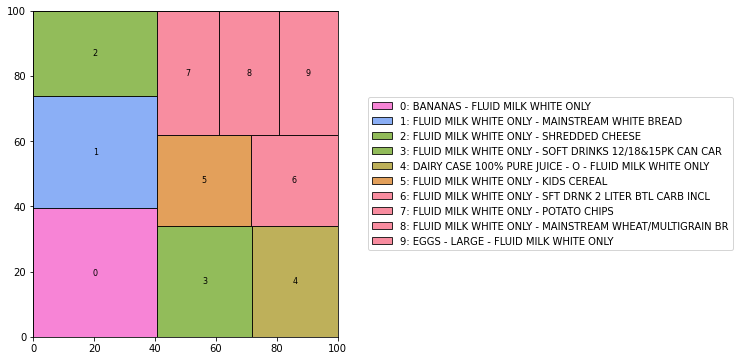

In [18]:
# Define custom color map
#colors = ['green', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000']
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
colors = sns.color_palette("husl", 10)
cmap = ListedColormap(colors[:len(pair_df)])
mini, maxi = pair_df['count'].min(), pair_df['count'].max()
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in pair_df['count']]
color_dict = {i+1:colors[i] for i in range(len(pair_df))}


# Create the treemap
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
squarify.plot(sizes=pair_df['count'], label=pair_df.index, alpha=.8, text_kwargs={'fontsize':8}, color=colors, ax=ax[0], edgecolor='black')

# Add legend
ax[1].axis('off')
handles = []
labels = []
for k, v in color_dict.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, fc=v, edgecolor='black', linewidth=1, alpha=0.8))
    labels.append(f"{k-1}: {pair_df.iloc[k-1]['product_type_1']} - {pair_df.iloc[k-1]['product_type_2']}")
ax[1].legend(handles, labels, loc='center')
plt.show()

## Coupons Analysis - Comparing the number of coupons distributed and redeemed for each Campaign and Department

Introduction - 

Here we are examining the performance of marketing campaigns through coupons by analyzing the issuance and redemption of coupons across various campaigns. Our analysis involves calculating the redemption rate for each campaign, as well as identifying the top 10 departments with the highest distribution of coupons. 


Analysis and Summary- 

The data suggests that coupon redemption is currently at its lowest, which could potentially have a negative impact on sales generated through marketing campaigns.
The highest redemption rate for a campaign is 12.5%, while the lowest is 0.02%, indicating that marketing strategies need to be customized to achieve better outcomes.
It is important to tailor marketing campaigns based on the performance of each campaign, as the redemption rate can vary significantly between them.
The department that received the highest number of coupons distributed is Grocery, suggesting that this department may have more potential for future marketing campaigns.

We have divided the given exploratory data analysis into two parts:
1. Analysing the data in  **coupons** and **coupon_redemptions** dataset to verify the number of coupons issued and redeemed and calculate Redemption rate for various campaigns
2. Merging & analysing the data with **products** dataset to verify the top 10 departments with most coupons 

In [19]:
# Data Extraction for analysis and Data segregation into different dataframes

df_transactions = data['transactions']
df_demographics = data['demographics']
df_products = data['products']
df_coupons = data['coupons']
df_coupon_redeem = data['coupon_redemptions']

In [20]:
df_coupons

coupon_upc  product_id  campaign_id
0       10000085207     9676830           26
1       10000085207     9676943           26
2       10000085207     9676944           26
3       10000085207     9676947           26
4       10000085207     9677008           26
...             ...         ...          ...
116199  59986600074    10456329           18
116200  59986600074    10457608           18
116201  59986600074    12385921           18
116202  59986600074     6961675           18
116203  59986600074      877774           18

[116204 rows x 3 columns]

In [21]:
df_coupon_redeem

household_id   coupon_upc  campaign_id redemption_date
0             1029  51380041013           26      2017-01-01
1             1029  51380041313           26      2017-01-01
2              165  53377610033           26      2017-01-03
3              712  51380041013           26      2017-01-07
4              712  54300016033           26      2017-01-07
...            ...          ...          ...             ...
2097           807  51200000076           23      2017-12-30
2098           807  55200017313           23      2017-12-30
2099          1676  10000085491           23      2017-12-30
2100          1676  54850010033           23      2017-12-30
2101          1437  10000089316           22      2017-12-31

[2102 rows x 4 columns]

### Joining Coupons and Coupon Redemption Tables based on different Campaigns

In [22]:
data_coupons = pd.merge(df_coupons, df_coupon_redeem, on=["coupon_upc", "campaign_id"])
data_coupons

coupon_upc  product_id  campaign_id  household_id redemption_date
0        10000085320     5565026           27           367      2017-02-23
1        10000085320     5565026           27           588      2017-03-05
2        10000085320     5578358           27           367      2017-02-23
3        10000085320     5578358           27           588      2017-03-05
4        10000085320     5582527           27           367      2017-02-23
...              ...         ...          ...           ...             ...
2169951  58978500076     1105635           13           889      2017-08-19
2169952  58978500076    13382529           13          1944      2017-08-12
2169953  58978500076    13382529           13           889      2017-08-19
2169954  58978500076      880780           13          1944      2017-08-12
2169955  58978500076      880780           13           889      2017-08-19

[2169956 rows x 5 columns]

### Data Manipulation:
Below query gets the **total coupons issued** and **coupons redeemed** based on different campaigns

In [23]:
campaign_counts = data_coupons.groupby("campaign_id").agg(total_issued=("coupon_upc", "count"), 
                                                     total_redeemed=("household_id", lambda x: x.nunique())).reset_index()

In [24]:
campaign_counts

campaign_id  total_issued  total_redeemed
0             1            14               1
1             2           160               2
2             3            82               2
3             4           222               6
4             5           555               8
5             6            18               1
6             7           332               5
7             8        380490             158
8             9          1778              20
9            10           660              10
10           11           364               6
11           12          1163              11
12           13        789918             196
13           14          2062              18
14           15            55               2
15           16          4183              19
16           17          1573              18
17           18        976810             214
18           19          1291              15
19           20          1155              11
20           21            54               2
21           22          3277              15
22           23           754               3
23           25             8               1
24           26           775              12
25           27          2203              36

### Data Manipulation (Calculating Redemption Rate):

In [25]:
campaign_counts["redemption_rate"] = (campaign_counts["total_redeemed"] / campaign_counts["total_issued"] ) * 100
campaign_counts

campaign_id  total_issued  total_redeemed  redemption_rate
0             1            14               1         7.142857
1             2           160               2         1.250000
2             3            82               2         2.439024
3             4           222               6         2.702703
4             5           555               8         1.441441
5             6            18               1         5.555556
6             7           332               5         1.506024
7             8        380490             158         0.041525
8             9          1778              20         1.124859
9            10           660              10         1.515152
10           11           364               6         1.648352
11           12          1163              11         0.945830
12           13        789918             196         0.024813
13           14          2062              18         0.872939
14           15            55               2         3.636364
15           16          4183              19         0.454219
16           17          1573              18         1.144310
17           18        976810             214         0.021908
18           19          1291              15         1.161890
19           20          1155              11         0.952381
20           21            54               2         3.703704
21           22          3277              15         0.457736
22           23           754               3         0.397878
23           25             8               1        12.500000
24           26           775              12         1.548387
25           27          2203              36         1.634135

### Line Graph: Coupons Redemption Rate by Campaign ID

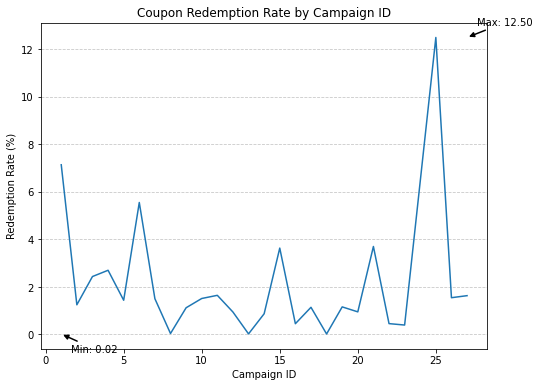

In [26]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(campaign_counts["campaign_id"], campaign_counts["redemption_rate"])
ax.set_xlabel("Campaign ID")
ax.set_ylabel("Redemption Rate (%)")
ax.set_title("Coupon Redemption Rate by Campaign ID")
ax.grid(axis="y", linestyle="--", alpha=0.7)
max_redemption_rate = campaign_counts["redemption_rate"].max()
min_redemption_rate = campaign_counts["redemption_rate"].min()

ax.annotate(f"Max: {max_redemption_rate:.2f}", xy=(campaign_counts["campaign_id"].iloc[-1], max_redemption_rate),
            xytext=(10, 10), textcoords="offset points", ha="left", va="bottom",
            arrowprops=dict(arrowstyle="-|>", color="black", lw=1.5))

ax.annotate(f"Min: {min_redemption_rate:.2f}", xy=(campaign_counts["campaign_id"].iloc[0], min_redemption_rate),
            xytext=(10, -10), textcoords="offset points", ha="left", va="top",
            arrowprops=dict(arrowstyle="-|>", color="black", lw=1.5))

plt.show()

### Data Manipulation: Merging Coupons Data with Products 

In [27]:
data_products = pd.merge(data_coupons, df_products, on="product_id")

In [28]:
data_products

coupon_upc  product_id  campaign_id  household_id redemption_date  \
0        10000085320     5565026           27           367      2017-02-23   
1        10000085320     5565026           27           588      2017-03-05   
2        10000085428     5565026           13           679      2017-08-13   
3        10000085428     5565026           13          2007      2017-08-16   
4        10000085428     5565026           13          2451      2017-08-17   
...              ...         ...          ...           ...             ...   
2169357  58000075224      655607           13           215      2017-09-02   
2169358  58000075224      655607           13           412      2017-09-04   
2169359  58000075224      964853           13           215      2017-09-02   
2169360  58000075224      964853           13           412      2017-09-04   
2169361  58304613450    15831572           18          1347      2017-11-03   

         manufacturer_id department     brand                product_category  \
0                   6210    DRUG GM  National           SHAVING CARE PRODUCTS   
1                   6210    DRUG GM  National           SHAVING CARE PRODUCTS   
2                   6210    DRUG GM  National           SHAVING CARE PRODUCTS   
3                   6210    DRUG GM  National           SHAVING CARE PRODUCTS   
4                   6210    DRUG GM  National           SHAVING CARE PRODUCTS   
...                  ...        ...       ...                             ...   
2169357             2326    GROCERY  National          SEAFOOD - SHELF STABLE   
2169358             2326    GROCERY  National          SEAFOOD - SHELF STABLE   
2169359             2326    GROCERY  National          SEAFOOD - SHELF STABLE   
2169360             2326    GROCERY  National          SEAFOOD - SHELF STABLE   
2169361             2412    GROCERY  National  WATER - CARBONATED/FLVRD DRINK   

              product_type package_size  
0        RAZORS AND BLADES         None  
1        RAZORS AND BLADES         None  
2        RAZORS AND BLADES         None  
3        RAZORS AND BLADES         None  
4        RAZORS AND BLADES         None  
...                    ...          ...  
2169357               TUNA       2.6 OZ  
2169358               TUNA       2.6 OZ  
2169359               TUNA       2.6 OZ  
2169360               TUNA       2.6 OZ  
2169361       SPRING WATER        88 OZ  

[2169362 rows x 11 columns]

### Total Coupons issued based on Product Type

In [29]:
coupon_counts = data_products.groupby('product_type')['coupon_upc'].count()
coupon_counts

product_type
ACNE MEDICATIONS              2144
ACTIVITY                        31
ADULT ANALGESICS             11282
ADULT CEREAL                  2689
ADULT INCONTINENCE BRIEFS      408
                             ...  
WRITING INSTRUMENTS              6
YARDLEY                         62
YELLOW SUMMER SQUASH           882
YOGURT MULTI-PACKS           13472
YOGURT NOT MULTI-PACKS       42631
Name: coupon_upc, Length: 1217, dtype: int64

### Total Coupons issued based on Department

In [30]:
coupon_counts_dep = data_products.groupby('department')['coupon_upc'].count()
coupon_counts_dep

department
CHEF SHOPPE           1204
COSMETICS            93336
COUPON                 187
DELI                  1772
DRUG GM             366752
FLORAL               88368
FROZEN GROCERY        1827
GARDEN CENTER        11746
GROCERY             611020
MEAT                302822
MEAT-PCKGD          271691
MISCELLANEOUS         7321
NUTRITION            49613
PASTRY                1132
PHOTO & VIDEO           82
PRODUCE             274476
SALAD BAR             4685
SEAFOOD              29199
SEAFOOD-PCKGD        49581
TRAVEL & LEISURE      2548
Name: coupon_upc, dtype: int64

In [31]:
dep_counts = coupon_counts_dep.sort_values(ascending=False)

### Top 10 Departments with most coupons issued 

In [32]:
dep_counts = dep_counts.head(10)
dep_counts

department
GROCERY          611020
DRUG GM          366752
MEAT             302822
PRODUCE          274476
MEAT-PCKGD       271691
COSMETICS         93336
FLORAL            88368
NUTRITION         49613
SEAFOOD-PCKGD     49581
SEAFOOD           29199
Name: coupon_upc, dtype: int64

### Bar Graph - Coupon Counts by Department

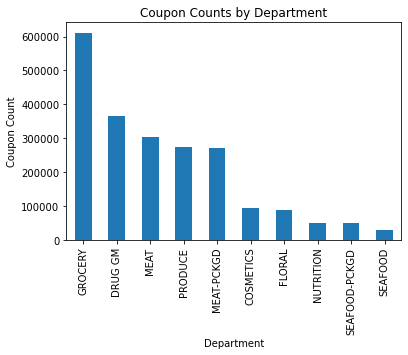

In [33]:
df_dep_counts = pd.Series(dep_counts)

df_dep_counts.plot(kind='bar')

plt.title('Coupon Counts by Department')
plt.xlabel('Department')
plt.ylabel('Coupon Count')

plt.show()

## Holiday Season - Redeemed Coupons & Inventory Distribution for each Department

We have divided the given exploratory data analysis into two parts:
1. Analysing the data in **coupon_redemptions** dataset to verify the number of coupons redeemed per month
2. Merging & analysing the data in **transactions & products** datasets to verify the total inventory sold 
   department-wise on monthly basis

In [34]:
# Data segregation into different dataframes

transactions_df = data['transactions']
demographics_df = data['demographics']
products_df = data['products']
coupons_redeem_df = data['coupon_redemptions']
camp_desc_df = data['campaign_descriptions']
promo_df = data['promotions']
coupon_df = data['coupons']
campaign_df = data['campaigns']

## PART-1:

In [35]:
coupons_redeem_df

household_id   coupon_upc  campaign_id redemption_date
0             1029  51380041013           26      2017-01-01
1             1029  51380041313           26      2017-01-01
2              165  53377610033           26      2017-01-03
3              712  51380041013           26      2017-01-07
4              712  54300016033           26      2017-01-07
...            ...          ...          ...             ...
2097           807  51200000076           23      2017-12-30
2098           807  55200017313           23      2017-12-30
2099          1676  10000085491           23      2017-12-30
2100          1676  54850010033           23      2017-12-30
2101          1437  10000089316           22      2017-12-31

[2102 rows x 4 columns]

### Data Manipulation (Creating Tidy Dataset):

1. To validate the number of coupons redeemed per month, we need to split the **redemption_date** column & create three new columns - **year, month & day**.<br>
2. We changed the numerical value in the **month** column to its respective alphabetical value

In [36]:
# Data Manipulation - Splitting redemption_date column into year, 
# month & column & reframing month column

coupons_redeem_df['year'] = pd.DatetimeIndex(coupons_redeem_df['redemption_date']).year
coupons_redeem_df['month'] = pd.DatetimeIndex(coupons_redeem_df['redemption_date']).month
coupons_redeem_df['day'] = pd.DatetimeIndex(coupons_redeem_df['redemption_date']).day
cpn_final_df = coupons_redeem_df
month_names = cpn_final_df['month'].apply(lambda x: calendar.month_name[x])
cpn_final_df['month'] = month_names
cpn_final_df

household_id   coupon_upc  campaign_id redemption_date  year     month  \
0             1029  51380041013           26      2017-01-01  2017   January   
1             1029  51380041313           26      2017-01-01  2017   January   
2              165  53377610033           26      2017-01-03  2017   January   
3              712  51380041013           26      2017-01-07  2017   January   
4              712  54300016033           26      2017-01-07  2017   January   
...            ...          ...          ...             ...   ...       ...   
2097           807  51200000076           23      2017-12-30  2017  December   
2098           807  55200017313           23      2017-12-30  2017  December   
2099          1676  10000085491           23      2017-12-30  2017  December   
2100          1676  54850010033           23      2017-12-30  2017  December   
2101          1437  10000089316           22      2017-12-31  2017  December   

      day  
0       1  
1       1  
2       3  
3       7  
4       7  
...   ...  
2097   30  
2098   30  
2099   30  
2100   30  
2101   31  

[2102 rows x 7 columns]

### Creating Dataset to plot Bar Graph:

In [37]:
# Creating dataframe to plot Bar Graph which determins the number of coupons redeemed per month

Bar_cpn = (cpn_final_df
           .groupby('month', as_index= False)
           .count()
           .reset_index(drop=True)
        )
Bar_cpn

month  household_id  coupon_upc  campaign_id  redemption_date  year  \
0       April            20          20           20               20    20   
1      August           424         424          424              424   424   
2    December           274         274          274              274   274   
3    February            44          44           44               44    44   
4     January            19          19           19               19    19   
5        July            47          47           47               47    47   
6        June           155         155          155              155   155   
7       March            32          32           32               32    32   
8         May           268         268          268              268   268   
9    November           526         526          526              526   526   
10    October            70          70           70               70    70   
11  September           223         223          223              223   223   

    day  
0    20  
1   424  
2   274  
3    44  
4    19  
5    47  
6   155  
7    32  
8   268  
9   526  
10   70  
11  223

### Bar Graph: Month(2017) v/s No. of Coupons Redeemed

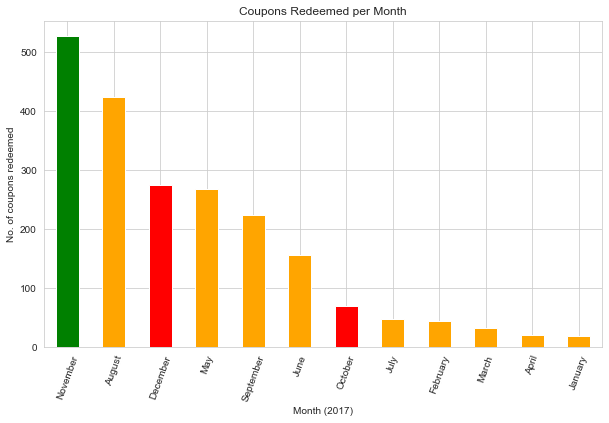

In [38]:
# Bar Graph

sns.set_style("whitegrid")
(
    Bar_cpn
    .sort_values('coupon_upc', ascending= False)
    .plot.bar(x='month', y='coupon_upc', color=['green', 'orange', 'red', 
                                                'orange', 'orange', 'orange', 'red',
                                                 'orange', 'orange', 'orange', 'orange' , 'orange'], 
               legend = None ,
               title='Coupons Redeemed per Month',
               xlabel='Month (2017)' , ylabel='No. of coupons redeemed',
               figsize=(10,6)
             )
    .tick_params(axis = 'x', labelrotation=70)
);

## PART-2:

### Data Manipulation (Creating Tidy Dataset):

1. To validate the total inventory sold per month, we need to split the the **transaction_timestamp** column & create two new columns - **date & time**.<br>
2. Further, we decided to split **date** column into three columns - **year, month & day**.<br>
3. We changed the numerical value in the **month** column to its respective alphabetical value

In [39]:
# Data Manipulation - Splitting transaction_timestamp column into date & time then
# splitting date column into year, month & day and then reframing month column

transactions_df['date'] = pd.to_datetime(transactions_df['transaction_timestamp']).dt.date
transactions_df['time'] = pd.to_datetime(transactions_df['transaction_timestamp']).dt.time


transactions_df['year'] = pd.DatetimeIndex(transactions_df['date']).year
transactions_df['month'] = pd.DatetimeIndex(transactions_df['date']).month
transactions_df['day'] = pd.DatetimeIndex(transactions_df['date']).day
transactions_df['month'] = month_names
transactions_df

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                 900       330  31198570047     9878513         1   
2                1228       406  31198655051     1041453         1   
3                 906       319  31198705046     1020156         1   
4                 906       319  31198705046     1053875         2   
...               ...       ...          ...         ...       ...   
1469302           679       447  41453103606    14025548         1   
1469303          2070       311  41453083334      909894         1   
1469304          2070       311  41453083334      933067         2   
1469305          2070       311  41453083334     1029743         1   
1469306          2070       311  41453083334     1061220         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               0.99         0.10          0.0                0.0     1   
2               1.43         0.15          0.0                0.0     1   
3               1.50         0.29          0.0                0.0     1   
4               2.78         0.80          0.0                0.0     1   
...              ...          ...          ...                ...   ...   
1469302         0.79         0.20          0.0                0.0    53   
1469303         1.73         0.17          0.0                0.0    53   
1469304         5.00         2.98          0.0                0.0    53   
1469305         2.60         0.29          0.0                0.0    53   
1469306         1.19         0.13          0.0                0.0    53   

        transaction_timestamp        date      time  year    month  day  
0         2017-01-01 11:53:26  2017-01-01  11:53:26  2017  January    1  
1         2017-01-01 12:10:28  2017-01-01  12:10:28  2017  January    1  
2         2017-01-01 12:26:30  2017-01-01  12:26:30  2017  January    1  
3         2017-01-01 12:30:27  2017-01-01  12:30:27  2017  January    1  
4         2017-01-01 12:30:27  2017-01-01  12:30:27  2017  January    1  
...                       ...         ...       ...   ...      ...  ...  
1469302   2018-01-01 03:50:03  2018-01-01  03:50:03  2018      NaN    1  
1469303   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  
1469304   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  
1469305   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  
1469306   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  

[1469307 rows x 16 columns]

After creating a tidy dataset of transactions, we joined it with product dataset.

In [40]:
# Joining Transactions & Products data set

tran_prod_merge = transactions_df.merge(products_df, how = 'inner' , on= 'product_id')
tran_prod_merge

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                1276       380  31198977289     1095275         2   
2                 762     31862  31225375060     1095275         1   
3                 113       375  31225637831     1095275         4   
4                 762     31862  31242385045     1095275         1   
...               ...       ...          ...         ...       ...   
1464466           287       396  41453077846      832759         1   
1464467          2255       391  41453429649      824678         1   
1464468          2410       315  41453087896    13910189         1   
1464469             6       450  41453124052    12263667         1   
1464470           811       446  41453043580     5587661         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  ...  \
0               0.50         0.00          0.0                0.0     1  ...   
1               1.00         0.00          0.0                0.0     1  ...   
2               0.50         0.00          0.0                0.0     2  ...   
3               2.00         0.00          0.0                0.0     2  ...   
4               0.25         0.25          0.0                0.0     2  ...   
...              ...          ...          ...                ...   ...  ...   
1464466         5.99         0.00          0.0                0.0    53  ...   
1464467         6.99         0.00          0.0                0.0    53  ...   
1464468         0.99         1.00          0.0                0.0    53  ...   
1464469         1.99         0.00          0.0                0.0    53  ...   
1464470         0.99         0.00          0.0                0.0    53  ...   

             time  year    month  day manufacturer_id  department     brand  \
0        11:53:26  2017  January    1               2      PASTRY  National   
1        22:23:53  2017      NaN    1               2      PASTRY  National   
2        12:39:36  2017      NaN    2               2      PASTRY  National   
3        21:09:18  2017      NaN    2               2      PASTRY  National   
4        12:21:27  2017      NaN    3               2      PASTRY  National   
...           ...   ...      ...  ...             ...         ...       ...   
1464466  02:00:27  2018      NaN    1            2468     GROCERY  National   
1464467  02:02:29  2018      NaN    1            2464     GROCERY  National   
1464468  02:25:57  2018      NaN    1             970     DRUG GM  National   
1464469  02:47:31  2018      NaN    1            1407     DRUG GM  National   
1464470  03:25:48  2018      NaN    1            5423  MEAT-PCKGD  National   

                       product_category              product_type package_size  
0                                 ROLLS             ROLLS: BAGELS         4 OZ  
1                                 ROLLS             ROLLS: BAGELS         4 OZ  
2                                 ROLLS             ROLLS: BAGELS         4 OZ  
3                                 ROLLS             ROLLS: BAGELS         4 OZ  
4                                 ROLLS             ROLLS: BAGELS         4 OZ  
...                                 ...                       ...          ...  
1464466                   DOMESTIC WINE       POPULAR 750ML WINES       750 ML  
1464467                   IMPORTED WINE  ALL OTHER IMPORTED WINES        1.5 L  
1464468             CHRISTMAS  SEASONAL                     DECOR         None  
1464469  GREETING CARDS/WRAP/PARTY SPLY            CARDS EVERYDAY         None  
1464470                       LUNCHMEAT                   BOLOGNA        16 OZ  

[1464471 rows x 22 columns]

### Creating Dataset to plot Line Chart:

In [41]:
# Creating dataframe to plot Line Graph

line_df = (tran_prod_merge
         .groupby(['month' , 'department'] , as_index= False)
         .agg({'quantity': 'sum'})
         .reset_index(drop=True)
        )
line_df.sort_values('quantity', ascending= False)

month     department  quantity
9      August           FUEL     28932
95  September           FUEL     15072
77   November           FUEL     14226
69        May  MISCELLANEOUS     10090
31   February           FUEL      8725
..        ...            ...       ...
55       June  SEAFOOD-PCKGD         1
56      March           DELI         1
59      March           MEAT         1
63        May      COSMETICS         1
37    January         PASTRY         1

[104 rows x 3 columns]

Since, we wanted to focus only on Holiday Season months, we created three different datasets for each month.

In [42]:
# Creating dataframe for Holiday Season Months

nov_df = line_df.query("month == 'November'")
dec_df = line_df.query("month == 'December'")
oct_df = line_df.query("month == 'October'")

### Line Chart: Department v/s Total Inventory Sold (November 2017)

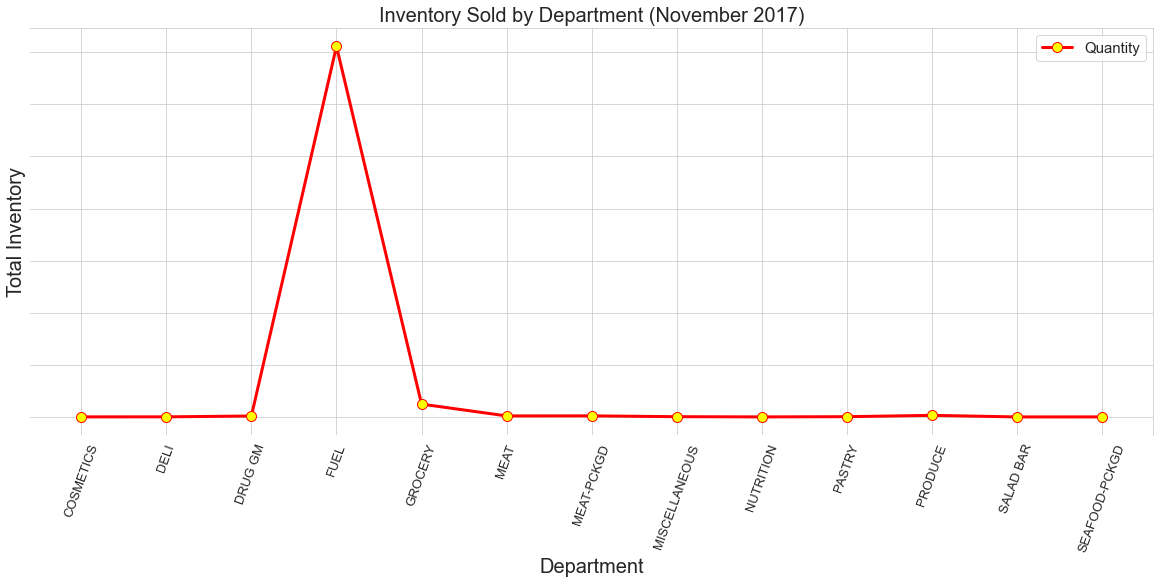

In [43]:
# Line Graph - November (2017)

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(16, 8), constrained_layout=True)

# Plot the data and add markers for each point
ax1.plot('department', 'quantity', data=nov_df, color='red', 
        linewidth= 3, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="yellow", label='Quantity')

# Add axis labels
ax1.set_xlabel('Department', fontsize=20)
ax1.set_ylabel('Total Inventory', fontsize=20)

# Add a title
ax1.set_title('Inventory Sold by Department (November 2017)', fontsize=20)

# Add a legend
ax1.legend(fontsize=15)

# Adjust tick label size
plt.tick_params(left = False, labelleft = False)

# Remove left and bottom spines
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='x', rotation = 70)

### Line Chart: Department v/s Total Inventory Sold (December 2017)

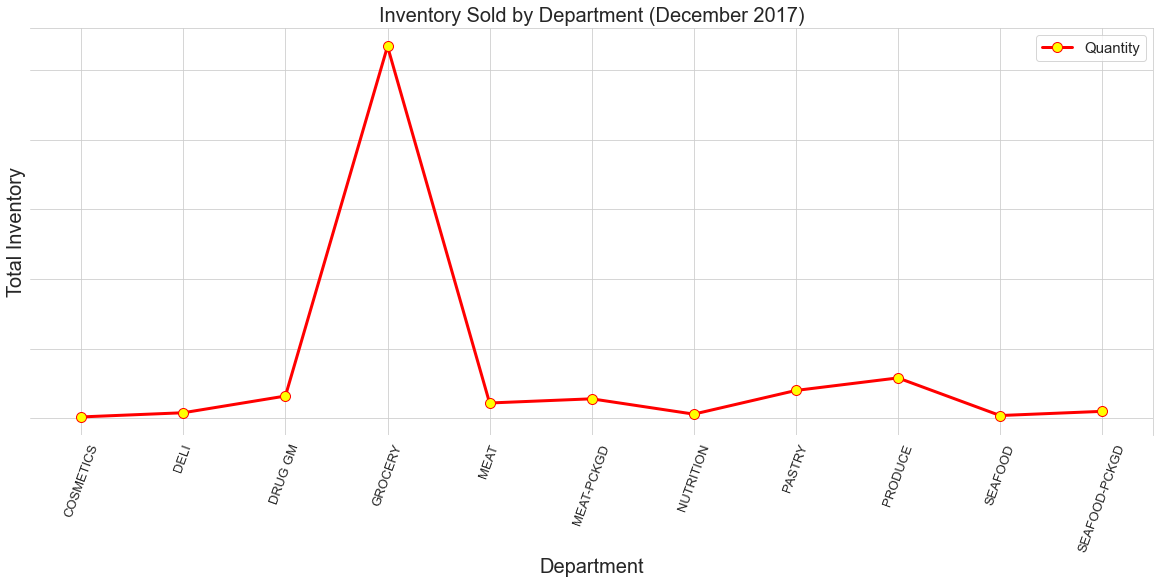

In [44]:
# Line Graph - December (2017)

sns.set_style("whitegrid")
fig, ax2 = plt.subplots(figsize=(16, 8), constrained_layout=True)

# Plot the data and add markers for each point
ax2.plot('department', 'quantity', data=dec_df, color='red', 
        linewidth= 3, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="yellow", label='Quantity')

# Add axis labels
ax2.set_xlabel('Department', fontsize=20)
ax2.set_ylabel('Total Inventory', fontsize=20)

# Add a title
ax2.set_title('Inventory Sold by Department (December 2017)', fontsize=20)

# Add a legend
ax2.legend(fontsize=15)

# Adjust tick label size
plt.tick_params(left = False, labelleft = False)

# Remove left and bottom spines
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='x', rotation = 70)

### Line Chart: Department v/s Total Inventory Sold (October 2017)

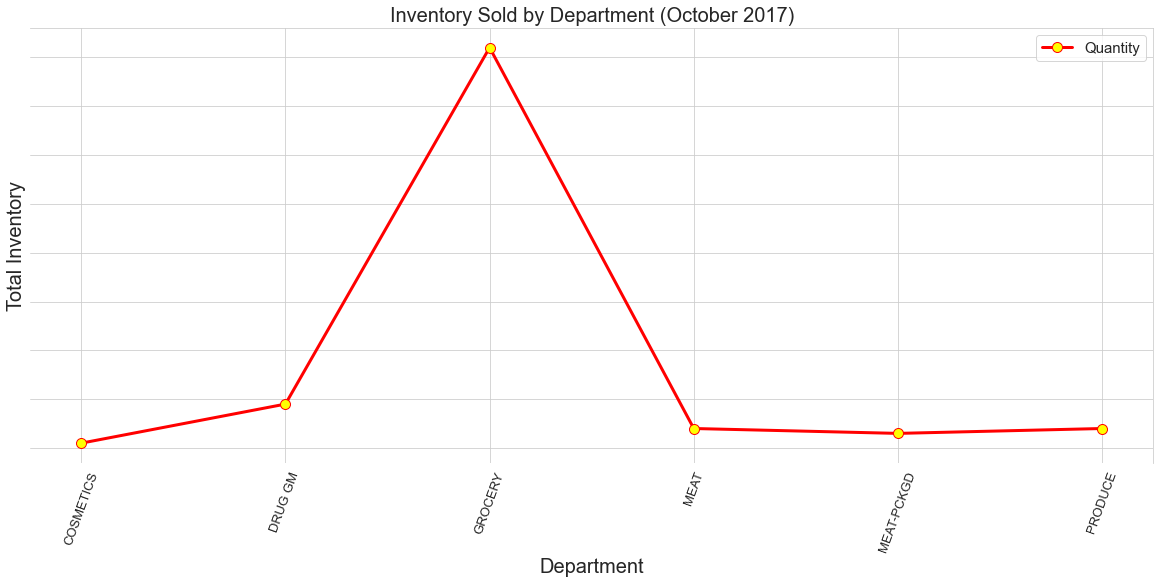

In [45]:
# Line Graph - October (2017)

sns.set_style("whitegrid")
fig, ax3 = plt.subplots(figsize=(16, 8), constrained_layout=True)

# Plot the data and add markers for each point
ax3.plot('department', 'quantity', data=oct_df, color='red', 
        linewidth= 3, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="yellow", label='Quantity')

# Add axis labels
ax3.set_xlabel('Department', fontsize=20)
ax3.set_ylabel('Total Inventory', fontsize=20)

# Add a title
ax3.set_title('Inventory Sold by Department (October 2017)', fontsize=20)

# Add a legend
ax3.legend(fontsize=15)

# Adjust tick label size
plt.tick_params(left = False, labelleft = False)

# Remove left and bottom spines
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='x', rotation = 70)

## Holiday Season and Non-Holiday Season

The goal of this analysis is to gain insights into the purchasing behavior of married and unmarried households during holiday and non-holiday periods, with a specific focus on identifying department-wise trends. By examining sales data for different departments, we aim to determine which products are most popular during each period and suggest promotional campaigns or coupons that can increase customer attraction for specific products.

### Preparing Data for Analysis

In [46]:

transactions = data['transactions']
demographics = data['demographics']
products = data['products']
campaign_descriptions = data['campaign_descriptions']
coupons = data['coupons']
promotions = data['promotions']

In [47]:
df1 = transactions
df1

household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                 900       330  31198570047     9878513         1   
2                1228       406  31198655051     1041453         1   
3                 906       319  31198705046     1020156         1   
4                 906       319  31198705046     1053875         2   
...               ...       ...          ...         ...       ...   
1469302           679       447  41453103606    14025548         1   
1469303          2070       311  41453083334      909894         1   
1469304          2070       311  41453083334      933067         2   
1469305          2070       311  41453083334     1029743         1   
1469306          2070       311  41453083334     1061220         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               0.99         0.10          0.0                0.0     1   
2               1.43         0.15          0.0                0.0     1   
3               1.50         0.29          0.0                0.0     1   
4               2.78         0.80          0.0                0.0     1   
...              ...          ...          ...                ...   ...   
1469302         0.79         0.20          0.0                0.0    53   
1469303         1.73         0.17          0.0                0.0    53   
1469304         5.00         2.98          0.0                0.0    53   
1469305         2.60         0.29          0.0                0.0    53   
1469306         1.19         0.13          0.0                0.0    53   

        transaction_timestamp        date      time  year    month  day  
0         2017-01-01 11:53:26  2017-01-01  11:53:26  2017  January    1  
1         2017-01-01 12:10:28  2017-01-01  12:10:28  2017  January    1  
2         2017-01-01 12:26:30  2017-01-01  12:26:30  2017  January    1  
3         2017-01-01 12:30:27  2017-01-01  12:30:27  2017  January    1  
4         2017-01-01 12:30:27  2017-01-01  12:30:27  2017  January    1  
...                       ...         ...       ...   ...      ...  ...  
1469302   2018-01-01 03:50:03  2018-01-01  03:50:03  2018      NaN    1  
1469303   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  
1469304   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  
1469305   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  
1469306   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      NaN    1  

[1469307 rows x 16 columns]

To facilitate our analysis of sales data during holiday and non-holiday periods, we are adding a new column called "Season." This column will allow us to easily categorize transactions as occurring during either the holiday season or the non-holiday season. We are defining the months of January through September as belonging to the non-holiday season, while the months of October through December are considered part of the holiday season. This classification reflects typical shopping patterns observed during these periods.
By adding this new column to our sales dataset, we can easily filter and aggregate data based on season and gain insights into how customer behavior varies during these different periods. 


In [48]:
df1['month'] = df1['transaction_timestamp'].dt.month
df1['season'] = np.where((df1['month'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9])), 'non-holiday season', 'holiday season')
df1


household_id  store_id    basket_id  product_id  quantity  \
0                 900       330  31198570044     1095275         1   
1                 900       330  31198570047     9878513         1   
2                1228       406  31198655051     1041453         1   
3                 906       319  31198705046     1020156         1   
4                 906       319  31198705046     1053875         2   
...               ...       ...          ...         ...       ...   
1469302           679       447  41453103606    14025548         1   
1469303          2070       311  41453083334      909894         1   
1469304          2070       311  41453083334      933067         2   
1469305          2070       311  41453083334     1029743         1   
1469306          2070       311  41453083334     1061220         1   

         sales_value  retail_disc  coupon_disc  coupon_match_disc  week  \
0               0.50         0.00          0.0                0.0     1   
1               0.99         0.10          0.0                0.0     1   
2               1.43         0.15          0.0                0.0     1   
3               1.50         0.29          0.0                0.0     1   
4               2.78         0.80          0.0                0.0     1   
...              ...          ...          ...                ...   ...   
1469302         0.79         0.20          0.0                0.0    53   
1469303         1.73         0.17          0.0                0.0    53   
1469304         5.00         2.98          0.0                0.0    53   
1469305         2.60         0.29          0.0                0.0    53   
1469306         1.19         0.13          0.0                0.0    53   

        transaction_timestamp        date      time  year  month  day  \
0         2017-01-01 11:53:26  2017-01-01  11:53:26  2017      1    1   
1         2017-01-01 12:10:28  2017-01-01  12:10:28  2017      1    1   
2         2017-01-01 12:26:30  2017-01-01  12:26:30  2017      1    1   
3         2017-01-01 12:30:27  2017-01-01  12:30:27  2017      1    1   
4         2017-01-01 12:30:27  2017-01-01  12:30:27  2017      1    1   
...                       ...         ...       ...   ...    ...  ...   
1469302   2018-01-01 03:50:03  2018-01-01  03:50:03  2018      1    1   
1469303   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      1    1   
1469304   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      1    1   
1469305   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      1    1   
1469306   2018-01-01 04:01:20  2018-01-01  04:01:20  2018      1    1   

                     season  
0        non-holiday season  
1        non-holiday season  
2        non-holiday season  
3        non-holiday season  
4        non-holiday season  
...                     ...  
1469302  non-holiday season  
1469303  non-holiday season  
1469304  non-holiday season  
1469305  non-holiday season  
1469306  non-holiday season  

[1469307 rows x 17 columns]

To calculate the total sales, we need to combine information from the transaction table, products table, and demographics table. This will enable us to identify which households made purchases and the specific products they bought, allowing us to determine the overall sales revenue.

In [49]:
df2 = pd.merge(df1, products, on='product_id', how='inner')
df2 = pd.merge(df2, demographics, on='household_id', how='inner')
df2

household_id  store_id    basket_id  product_id  quantity  \
0                900       330  31198570044     1095275         1   
1                900       330  31541475196     1095275         1   
2                900       330  31672350129     1095275         1   
3                900       330  31883555076     1095275         1   
4                900       330  31944515097     1095275         1   
...              ...       ...          ...         ...       ...   
825617          2364       673  41415631140     1982306         1   
825618          2364       673  41415631140     1989572         1   
825619          2364       673  41415631140     2010598         1   
825620          2364       673  41415631140     5704919         1   
825621          2364       673  41415631140     9681132         1   

        sales_value  retail_disc  coupon_disc  coupon_match_disc  week  ...  \
0              0.50         0.00          0.0                0.0     1  ...   
1              0.25         0.25          0.0                0.0     5  ...   
2              0.25         0.25          0.0                0.0     5  ...   
3              0.50         0.00          0.0                0.0     8  ...   
4              0.50         0.00          0.0                0.0     8  ...   
...             ...          ...          ...                ...   ...  ...   
825617         0.80         0.43          0.0                0.0    53  ...   
825618         3.99         0.00          0.0                0.0    53  ...   
825619         0.57         0.00          0.0                0.0    53  ...   
825620         1.79         0.10          0.0                0.0    53  ...   
825621         1.88         0.00          0.0                0.0    53  ...   

                 product_category                  product_type package_size  \
0                           ROLLS                 ROLLS: BAGELS         4 OZ   
1                           ROLLS                 ROLLS: BAGELS         4 OZ   
2                           ROLLS                 ROLLS: BAGELS         4 OZ   
3                           ROLLS                 ROLLS: BAGELS         4 OZ   
4                           ROLLS                 ROLLS: BAGELS         4 OZ   
...                           ...                           ...          ...   
825617       FRUIT - SHELF STABLE    FRUIT COCKTAIL FRUIT SALAD        15 OZ   
825618             DINNER SAUSAGE                 SMOKED/COOKED         1 LB   
825619  VEGETABLES - SHELF STABLE            BEANS WAX SHELLIES      14.5 OZ   
825620     BAKED BREAD/BUNS/ROLLS                    RYE BREADS        24 OZ   
825621          SPICES & EXTRACTS  TABLE SALT POPCORN SALTICE C         3 LB   

          age  income  home_ownership marital_status  household_size  \
0       35-44  35-49K       Homeowner        Married               2   
1       35-44  35-49K       Homeowner        Married               2   
2       35-44  35-49K       Homeowner        Married               2   
3       35-44  35-49K       Homeowner        Married               2   
4       35-44  35-49K       Homeowner        Married               2   
...       ...     ...             ...            ...             ...   
825617  45-54  25-34K          Renter        Married               2   
825618  45-54  25-34K          Renter        Married               2   
825619  45-54  25-34K          Renter        Married               2   
825620  45-54  25-34K          Renter        Married               2   
825621  45-54  25-34K          Renter        Married               2   

          household_comp kids_count  
0       2 Adults No Kids          0  
1       2 Adults No Kids          0  
2       2 Adults No Kids          0  
3       2 Adults No Kids          0  
4       2 Adults No Kids          0  
...                  ...        ...  
825617  2 Adults No Kids          0  
825618  2 Adults No Kids          0  
825619  2 Adults No Kids          0  
825620  2 Adults No Kids

To differentiate between married and unmarried households, we have created a new column in the demographic table called "marital status". We can then use this column to filter out families with married and unmarried statuses, enabling us to analyze and compare the behavior and preferences of these two groups separately.

In [50]:
df2['marital_status'] = np.where(df2['marital_status'] == 'Married', 'Married', 'Unmarried')
df2

household_id  store_id    basket_id  product_id  quantity  \
0                900       330  31198570044     1095275         1   
1                900       330  31541475196     1095275         1   
2                900       330  31672350129     1095275         1   
3                900       330  31883555076     1095275         1   
4                900       330  31944515097     1095275         1   
...              ...       ...          ...         ...       ...   
825617          2364       673  41415631140     1982306         1   
825618          2364       673  41415631140     1989572         1   
825619          2364       673  41415631140     2010598         1   
825620          2364       673  41415631140     5704919         1   
825621          2364       673  41415631140     9681132         1   

        sales_value  retail_disc  coupon_disc  coupon_match_disc  week  ...  \
0              0.50         0.00          0.0                0.0     1  ...   
1              0.25         0.25          0.0                0.0     5  ...   
2              0.25         0.25          0.0                0.0     5  ...   
3              0.50         0.00          0.0                0.0     8  ...   
4              0.50         0.00          0.0                0.0     8  ...   
...             ...          ...          ...                ...   ...  ...   
825617         0.80         0.43          0.0                0.0    53  ...   
825618         3.99         0.00          0.0                0.0    53  ...   
825619         0.57         0.00          0.0                0.0    53  ...   
825620         1.79         0.10          0.0                0.0    53  ...   
825621         1.88         0.00          0.0                0.0    53  ...   

                 product_category                  product_type package_size  \
0                           ROLLS                 ROLLS: BAGELS         4 OZ   
1                           ROLLS                 ROLLS: BAGELS         4 OZ   
2                           ROLLS                 ROLLS: BAGELS         4 OZ   
3                           ROLLS                 ROLLS: BAGELS         4 OZ   
4                           ROLLS                 ROLLS: BAGELS         4 OZ   
...                           ...                           ...          ...   
825617       FRUIT - SHELF STABLE    FRUIT COCKTAIL FRUIT SALAD        15 OZ   
825618             DINNER SAUSAGE                 SMOKED/COOKED         1 LB   
825619  VEGETABLES - SHELF STABLE            BEANS WAX SHELLIES      14.5 OZ   
825620     BAKED BREAD/BUNS/ROLLS                    RYE BREADS        24 OZ   
825621          SPICES & EXTRACTS  TABLE SALT POPCORN SALTICE C         3 LB   

          age  income  home_ownership marital_status  household_size  \
0       35-44  35-49K       Homeowner        Married               2   
1       35-44  35-49K       Homeowner        Married               2   
2       35-44  35-49K       Homeowner        Married               2   
3       35-44  35-49K       Homeowner        Married               2   
4       35-44  35-49K       Homeowner        Married               2   
...       ...     ...             ...            ...             ...   
825617  45-54  25-34K          Renter        Married               2   
825618  45-54  25-34K          Renter        Married               2   
825619  45-54  25-34K          Renter        Married               2   
825620  45-54  25-34K          Renter        Married               2   
825621  45-54  25-34K          Renter        Married               2   

          household_comp kids_count  
0       2 Adults No Kids          0  
1       2 Adults No Kids          0  
2       2 Adults No Kids          0  
3       2 Adults No Kids          0  
4       2 Adults No Kids          0  
...                  ...        ...  
825617  2 Adults No Kids          0  
825618  2 Adults No Kids          0  
825619  2 Adults No Kids          0  
825620  2 Adults No Kids

In this section of the analysis, we are performing a group-wise analysis of sales data by grouping the data by two variables - 'season' and 'marital_status'. We then aggregate the sales data on unique basket IDs and use this information to calculate the total sales value for each combination of season and marital status. This allows us to gain insights into which household groups are driving sales during different seasons and how their behavior varies depending on their marital status.

In [51]:
grouped_transactions = df2.groupby(['season',
                                    'marital_status']).agg({'sales_value': 'sum',
                                                            'basket_id' : 'nunique'}).reset_index()

### Total Sales Graph by marital status during non-holiday and holiday season

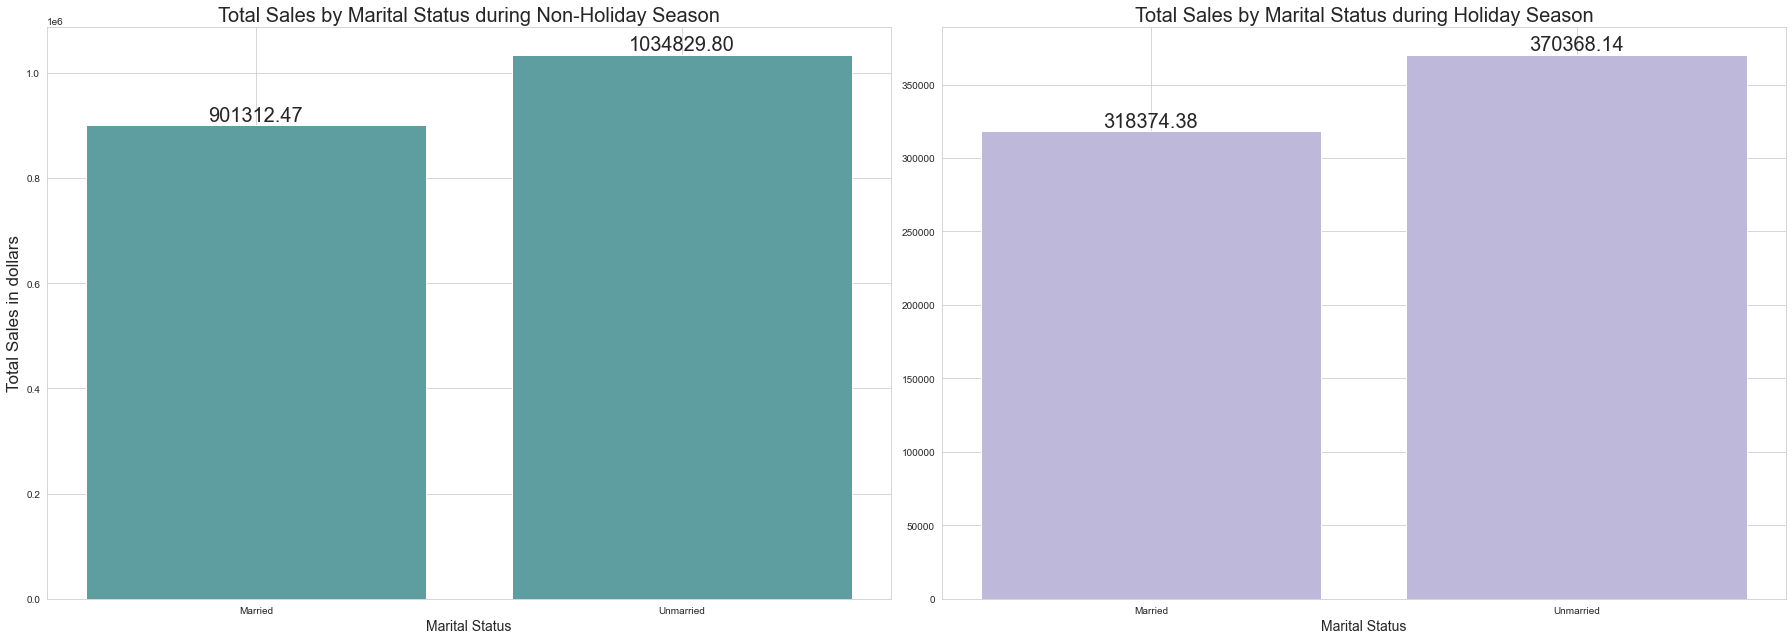

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 9))

married_bars = axs[0].bar(grouped_transactions[grouped_transactions['season'] == 'non-holiday season']['marital_status'],
                          grouped_transactions[grouped_transactions['season'] == 'non-holiday season']['sales_value'],
                          color='cadetblue')
axs[0].set_title('Total Sales by Marital Status during Non-Holiday Season',fontsize = 20)
axs[0].set_xlabel('Marital Status', fontsize = 14)
axs[0].set_ylabel('Total Sales in dollars', fontsize = 17)

for i, bar in enumerate(married_bars):
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2., 1*height, 
                f'{grouped_transactions[grouped_transactions["season"] == "non-holiday season"].iloc[i]["sales_value"]:.2f}', 
                ha='center', va='bottom', fontsize=20)

unmarried_bars = axs[1].bar(grouped_transactions[grouped_transactions['season'] == 'holiday season']['marital_status'],
                            grouped_transactions[grouped_transactions['season'] == 'holiday season']['sales_value'],
                            color='#beb9db')

axs[1].set_title('Total Sales by Marital Status during Holiday Season',fontsize = 20)
axs[1].set_xlabel('Marital Status',fontsize=14)


for i, bar in enumerate(unmarried_bars):
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2., 1*height, 
                f'{grouped_transactions[grouped_transactions["season"] == "holiday season"].iloc[i]["sales_value"]:.2f}', 
                ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')
plt.show()


Our analysis includes an examination of total sales during both holiday and non-holiday seasons. With the longer duration of non-holiday seasons (nine months), sales are higher during this time period compared to the three-month holiday season. However, when considering the relative duration of each season, holiday season sales are relatively strong, approaching nearly half of the sales during non-holiday periods. This suggests that the holiday season is a critical period for sales. Our next step is to identify the departments that are performing well, in order to develop a targeted campaign to promote further store visits and purchases. Potential tactics could include a promotional campaign or distributing coupons to incentivize customer behavior.

### Sales by Departments during non-holiday and holiday seasons

To better understand the impact of holiday seasons on sales, we can use the indicators of married and unmarried households to calculate the total sales for each department during both holiday and non-holiday periods.

Using these indicators, we can segment the data by marital status and then group it by department and season to determine the total sales for each group. This allows us to identify which departments see the most sales during the holiday season and whether this differs between married and unmarried households.

### Sales During Holiday Season

In [53]:
grouped_transactions_dep = df2.groupby(['season', 'marital_status', 'department']).agg({'sales_value': 'sum'}).reset_index()
pd.set_option('display.max_rows', None)

grouped_transactions_dep[grouped_transactions_dep['season'] == 'holiday season']


season marital_status        department  sales_value
0   holiday season        Married        AUTOMOTIVE        22.95
1   holiday season        Married       CHEF SHOPPE       223.72
2   holiday season        Married   CNTRL/STORE SUP        10.95
3   holiday season        Married         COSMETICS      1651.74
4   holiday season        Married            COUPON        33.57
5   holiday season        Married              DELI     11254.48
6   holiday season        Married           DRUG GM     42469.83
7   holiday season        Married            FLORAL      1526.41
8   holiday season        Married    FROZEN GROCERY        44.83
9   holiday season        Married              FUEL     21606.15
10  holiday season        Married     GARDEN CENTER       281.17
11  holiday season        Married      GM MERCH EXP         8.82
12  holiday season        Married           GROCERY    160107.74
13  holiday season        Married              MEAT     19935.07
14  holiday season        Married        MEAT-PCKGD     12957.05
15  holiday season        Married     MISCELLANEOUS      7621.03
16  holiday season        Married         NUTRITION      4498.47
17  holiday season        Married            PASTRY      5028.54
18  holiday season        Married           PRODUCE     23485.21
19  holiday season        Married        RESTAURANT       124.38
20  holiday season        Married         SALAD BAR      1044.32
21  holiday season        Married           SEAFOOD      1149.46
22  holiday season        Married     SEAFOOD-PCKGD      2333.51
23  holiday season        Married           SPIRITS       771.36
24  holiday season        Married  TRAVEL & LEISURE       183.62
25  holiday season      Unmarried        AUTOMOTIVE        52.72
26  holiday season      Unmarried       CHEF SHOPPE        91.97
27  holiday season      Unmarried   CNTRL/STORE SUP         5.00
28  holiday season      Unmarried         COSMETICS      1587.91
29  holiday season      Unmarried            COUPON        48.82
30  holiday season      Unmarried              DELI     11520.51
31  holiday season      Unmarried           DRUG GM     51995.57
32  holiday season      Unmarried            FLORAL      1603.06
33  holiday season      Unmarried    FROZEN GROCERY        40.19
34  holiday season      Unmarried              FUEL     28268.00
35  holiday season      Unmarried     GARDEN CENTER       196.94
36  holiday season      Unmarried      GM MERCH EXP         5.16
37  holiday season      Unmarried           GROCERY    188775.89
38  holiday season      Unmarried              MEAT     23756.94
39  holiday season      Unmarried        MEAT-PCKGD     16237.59
40  holiday season      Unmarried     MISCELLANEOUS      5585.28
41  holiday season      Unmarried         NUTRITION      4792.93
42  holiday season      Unmarried            PASTRY      5503.71
43  holiday season      Unmarried     PHOTO & VIDEO         6.72
44  holiday season      Unmarried           PRODUCE     23521.35
45  holiday season      Unmarried        RESTAURANT        83.03
46  holiday season      Unmarried         SALAD BAR      1317.65
47  holiday season      Unmarried           SEAFOOD      1255.77
48  holiday season      Unmarried     SEAFOOD-PCKGD      2735.57
49  holiday season      Unmarried           SPIRITS      1197.51
50  holiday season      Unmarried  TRAVEL & LEISURE       182.35

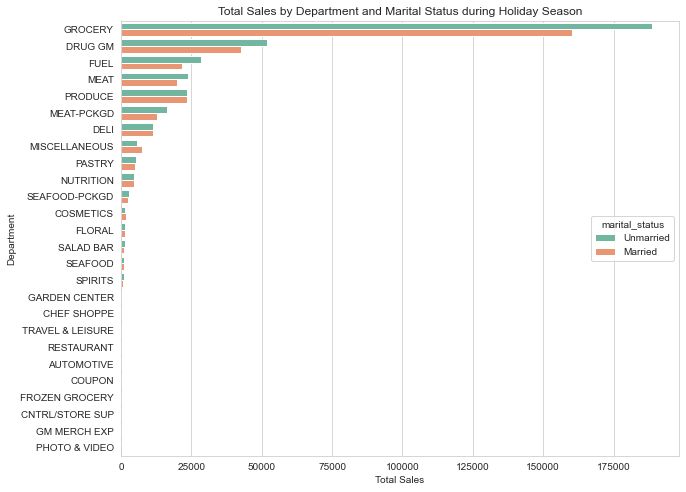

In [54]:
non_holiday_sales = grouped_transactions_dep[grouped_transactions_dep['season'] == 'holiday season']
non_holiday_sales = non_holiday_sales.sort_values(['sales_value'], ascending=[0])
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(x="sales_value", y="department", hue="marital_status", data=non_holiday_sales, palette="Set2")
plt.xlabel("Total Sales")
plt.ylabel("Department")
plt.title("Total Sales by Department and Marital Status during Holiday Season")
plt.show()

### Sales During Non-Holiday Season

In [55]:
pd.set_option('display.max_rows', None)
grouped_transactions_dep[grouped_transactions_dep['season'] == 'non-holiday season']


season marital_status        department  sales_value
51   non-holiday season        Married        AUTOMOTIVE        39.67
52   non-holiday season        Married       CHEF SHOPPE       459.06
53   non-holiday season        Married         COSMETICS      4014.35
54   non-holiday season        Married            COUPON       164.37
55   non-holiday season        Married              DELI     31324.89
56   non-holiday season        Married           DRUG GM    107261.53
57   non-holiday season        Married            FLORAL      4301.31
58   non-holiday season        Married    FROZEN GROCERY       113.72
59   non-holiday season        Married              FUEL     78663.46
60   non-holiday season        Married     GARDEN CENTER      1608.55
61   non-holiday season        Married      GM MERCH EXP         9.22
62   non-holiday season        Married           GROCERY    440924.00
63   non-holiday season        Married              MEAT     56424.64
64   non-holiday season        Married        MEAT-PCKGD     40149.88
65   non-holiday season        Married     MISCELLANEOUS     19717.11
66   non-holiday season        Married         NUTRITION     13687.33
67   non-holiday season        Married            PASTRY     13144.41
68   non-holiday season        Married     PHOTO & VIDEO         8.36
69   non-holiday season        Married     POSTAL CENTER         4.08
70   non-holiday season        Married    PROD-WHS SALES         2.52
71   non-holiday season        Married           PRODUCE     73064.30
72   non-holiday season        Married        RESTAURANT       294.94
73   non-holiday season        Married         SALAD BAR      2970.74
74   non-holiday season        Married           SEAFOOD      3919.17
75   non-holiday season        Married     SEAFOOD-PCKGD      6320.65
76   non-holiday season        Married           SPIRITS      2529.54
77   non-holiday season        Married  TRAVEL & LEISURE       190.67
78   non-holiday season      Unmarried        AUTOMOTIVE        34.13
79   non-holiday season      Unmarried       CHEF SHOPPE       354.70
80   non-holiday season      Unmarried   CNTRL/STORE SUP         0.00
81   non-holiday season      Unmarried         COSMETICS      4100.73
82   non-holiday season      Unmarried            COUPON       127.68
83   non-holiday season      Unmarried              DELI     32280.23
84   non-holiday season      Unmarried           DRUG GM    135731.07
85   non-holiday season      Unmarried            FLORAL      5063.80
86   non-holiday season      Unmarried    FROZEN GROCERY        57.44
87   non-holiday season      Unmarried              FUEL     81799.57
88   non-holiday season      Unmarried     GARDEN CENTER      1042.70
89   non-holiday season      Unmarried      GM MERCH EXP        25.96
90   non-holiday season      Unmarried           GROCERY    520577.65
91   non-holiday season      Unmarried              MEAT     68898.31
92   non-holiday season      Unmarried        MEAT-PCKGD     51025.28
93   non-holiday season      Unmarried     MISCELLANEOUS     13866.62
94   non-holiday season      Unmarried         NUTRITION     12800.78
95   non-holiday season      Unmarried            PASTRY     14651.52
96   non-holiday season      Unmarried     PHOTO & VIDEO        10.66
97   non-holiday season      Unmarried     POSTAL CENTER         1.49
98   non-holiday season      Unmarried           PRODUCE     73923.04
99   non-holiday season      Unmarried        RESTAURANT       306.14
100  non-holiday season      Unmarried         SALAD BAR      4468.45
101  non-holiday season      Unmarried           SEAFOOD      3705.33
102  non-holiday season      Unmarried     SEAFOOD-PCKGD      7606.64
103  non-holiday season      Unmarried           SPIRITS      2053.31
104  non-holiday season      Unmarried  TRAVEL & LEISURE       316.57

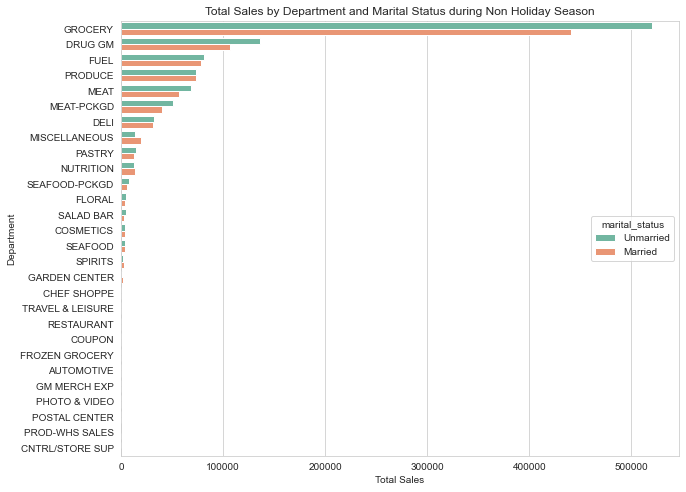

In [56]:
holiday_sales = grouped_transactions_dep[grouped_transactions_dep['season'] == 'non-holiday season']
holiday_sales = holiday_sales.sort_values(['sales_value'], ascending=[0])
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(x="sales_value", y="department", hue="marital_status", data=holiday_sales, palette="Set2")
plt.xlabel("Total Sales")
plt.ylabel("Department")
plt.title("Total Sales by Department and Marital Status during Non Holiday Season")
plt.show()

# Summary 

In conclusion, our analysis has led us to draw certain conclusions and offer some suggestions for further consideration,

1. "FLUID MILK WHITE ONLY" is a frequently purchased product and can be combined with other items like Bread, Cheese, Cereal, and Juices to increase sales for both product types. Applying lucrative offers on these product combinations can be effective.

2. Coupon redemption rate is currently low, with variations across campaigns. Customized marketing strategies tailored to each campaign's performance may lead to better outcomes. The Grocery department received the highest number of distributed coupons, indicating potential for future marketing campaigns.

3. FUEL department performed well in November, with the highest number of redeemed coupons, suggesting a marketing strategy to distribute coupons redeemable in December and October could be effective.

4. The holiday season is a critical period for sales, and certain departments such as grocery, drugs, GM, fuel, and meat products make the most sales during both holiday and non-holiday seasons. Targeted promotional campaigns such as distributing coupons or offering discounts could incentivize customer behavior and drive store visits and purchases.


# Limitations

We didn't use all the tables available in the dataset of Complete Journey Package. We wanted to use the "promotions" table available in the dataset, but could'nt do so because of the enormous size of the table which made it diffiult to perform any join operations on that table.